# EDA - Inflation and Credit Focus

In [118]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append('/Users/AaranDaniel/Desktop/DSI/projects/Group_Project_5_GA/code/')
from time_series_plots import plot_time_series
sns.set_style("darkgrid")

In [119]:
df_FRB = pd.read_csv("/Users/AaranDaniel/Desktop/DSI/projects/Group_Project_5_GA/data/frb_monthly_debt_bal_clean.csv", index_col='date', parse_dates=True)

In [120]:
df = pd.read_csv('../data/master_with_gdp.csv', index_col='date', parse_dates=True)
df.drop(columns=['year', 'month'], inplace=True)
df.head()


,population,unemployment_rate,hourly_earnings_yoy,cpi_yoy,shelter_yoy,energy_yoy,medical_care_yoy,food_yoy,gasoline_yoy,imports_yoy,...,tax_personal_current,tax_gov_social_insurance_domestic,tax_total_all_taxes,cc_rate_all_ns,mortgage_rate_30_yr,cc_bals_30d_due_percentage,cc_bals_90d_due_percentage,cc_balance_total_billions,credit_yoy,gdp
date,,,,,,,,,,,,,,,,,,,,,
2001-01-01,283960000.0,4.2,NaN,3.732227,3.252886,17.777778,4.538341,2.889825,13.143736,2.760736,...,1.289199e+12,7.281720e+11,2.068559e+12,.,7.0325,NaN,NaN,NaN,12.391364,10470.231000
2001-02-01,284166000.0,4.2,NaN,3.533569,3.457307,13.110540,4.600390,3.006615,8.400292,0.200602,...,1.303434e+12,7.330290e+11,2.087987e+12,15.63,7.0500,NaN,NaN,NaN,12.757135,10513.154000
2001-03-01,284380000.0,4.3,NaN,2.920561,3.496868,5.973813,4.540163,3.123123,-6.099935,-1.601602,...,1.313079e+12,7.357760e+11,2.100751e+12,.,6.9520,NaN,NaN,NaN,12.611905,10556.077000
2001-04-01,284602000.0,4.4,NaN,3.269119,3.595623,10.273405,4.643963,3.181273,3.851262,-0.710660,...,1.315105e+12,7.335270e+11,2.100756e+12,.,7.0775,NaN,NaN,NaN,12.895804,10599.000000
2001-05-01,284834000.0,4.3,NaN,3.615160,3.742204,15.785124,4.668210,3.108189,15.420561,-0.809717,...,1.310869e+12,7.328300e+11,2.096159e+12,15.06,7.1450,NaN,NaN,NaN,12.498904,10598.673333


In [121]:
# make subset of particular variables to focus on
df_subset = df[['cpi_yoy', 'personal_saving_as_a_percentage_of_disposable_personal_income',
                'disp_inc_per_capita_current_dollars',
                 'cc_bals_90d_due_percentage', 'cc_bals_30d_due_percentage',
                 'disp_inc_per_capita_chained_2017', 'cc_balance_total_billions',
                 'total_disposable_personal_income', 'credit_yoy', 'gdp']]
df_subset = df_subset.merge(df_FRB[['total_consumer_credit_owned_and_securitized_not_seasonally_adjusted_level_(currency_1000000)']],
              left_index=True, right_index=True, how='left')
df_subset['total_consumer_credit'] = df_subset['total_consumer_credit_owned_and_securitized_not_seasonally_adjusted_level_(currency_1000000)'] * 1000000
df_subset.drop(columns = 'total_consumer_credit_owned_and_securitized_not_seasonally_adjusted_level_(currency_1000000)', inplace=True)
df_subset.head()

,cpi_yoy,personal_saving_as_a_percentage_of_disposable_personal_income,disp_inc_per_capita_current_dollars,cc_bals_90d_due_percentage,cc_bals_30d_due_percentage,disp_inc_per_capita_chained_2017,cc_balance_total_billions,total_disposable_personal_income,credit_yoy,gdp,total_consumer_credit
date,,,,,,,,,,,
2001-01-01,3.732227,4.5,26946.0,NaN,NaN,35962.0,NaN,7.651692e+12,12.391364,10470.231000,1.744174e+12
2001-02-01,3.533569,4.6,27000.0,NaN,NaN,35977.0,NaN,7.672371e+12,12.757135,10513.154000,1.746978e+12
2001-03-01,2.920561,4.9,27064.0,NaN,NaN,36059.0,NaN,7.696337e+12,12.611905,10556.077000,1.749724e+12
2001-04-01,3.269119,4.8,27034.0,NaN,NaN,35956.0,NaN,7.693797e+12,12.895804,10599.000000,1.765924e+12
2001-05-01,3.615160,4.3,27034.0,NaN,NaN,35862.0,NaN,7.700196e+12,12.498904,10598.673333,1.773883e+12


In [122]:
df_subset.describe()

,cpi_yoy,personal_saving_as_a_percentage_of_disposable_personal_income,disp_inc_per_capita_current_dollars,cc_bals_90d_due_percentage,cc_bals_30d_due_percentage,disp_inc_per_capita_chained_2017,cc_balance_total_billions,total_disposable_personal_income,credit_yoy,gdp,total_consumer_credit
count,276.000000,276.000000,276.000000,45.000000,45.000000,276.000000,45.000000,2.760000e+02,276.000000,276.000000,2.760000e+02
mean,2.528411,5.791304,40431.054348,1.201556,2.449111,42484.927536,657.073333,1.280278e+13,5.008511,17196.685815,3.090409e+12
std,1.834622,3.337217,9279.270569,0.236758,0.400414,4483.042985,78.877799,3.544269e+12,3.084354,4581.662991,9.041125e+11
min,-2.097161,1.400000,26946.000000,0.720000,1.560000,35843.000000,551.970000,7.651692e+12,-4.125881,10470.231000,1.744174e+12
25%,1.513777,4.400000,33488.000000,1.030000,2.220000,39571.750000,595.300000,1.003446e+13,4.423791,14025.445667,2.410295e+12
50%,2.160308,5.400000,38930.500000,1.170000,2.470000,40941.500000,651.880000,1.226710e+13,5.516718,16300.803333,2.794776e+12
75%,3.258220,6.300000,46365.750000,1.340000,2.740000,45643.750000,703.950000,1.521990e+13,6.655239,20432.331667,3.832957e+12
max,9.059758,32.000000,65833.000000,1.730000,3.190000,61509.000000,864.340000,2.185808e+13,12.895804,27998.973599,5.010284e+12


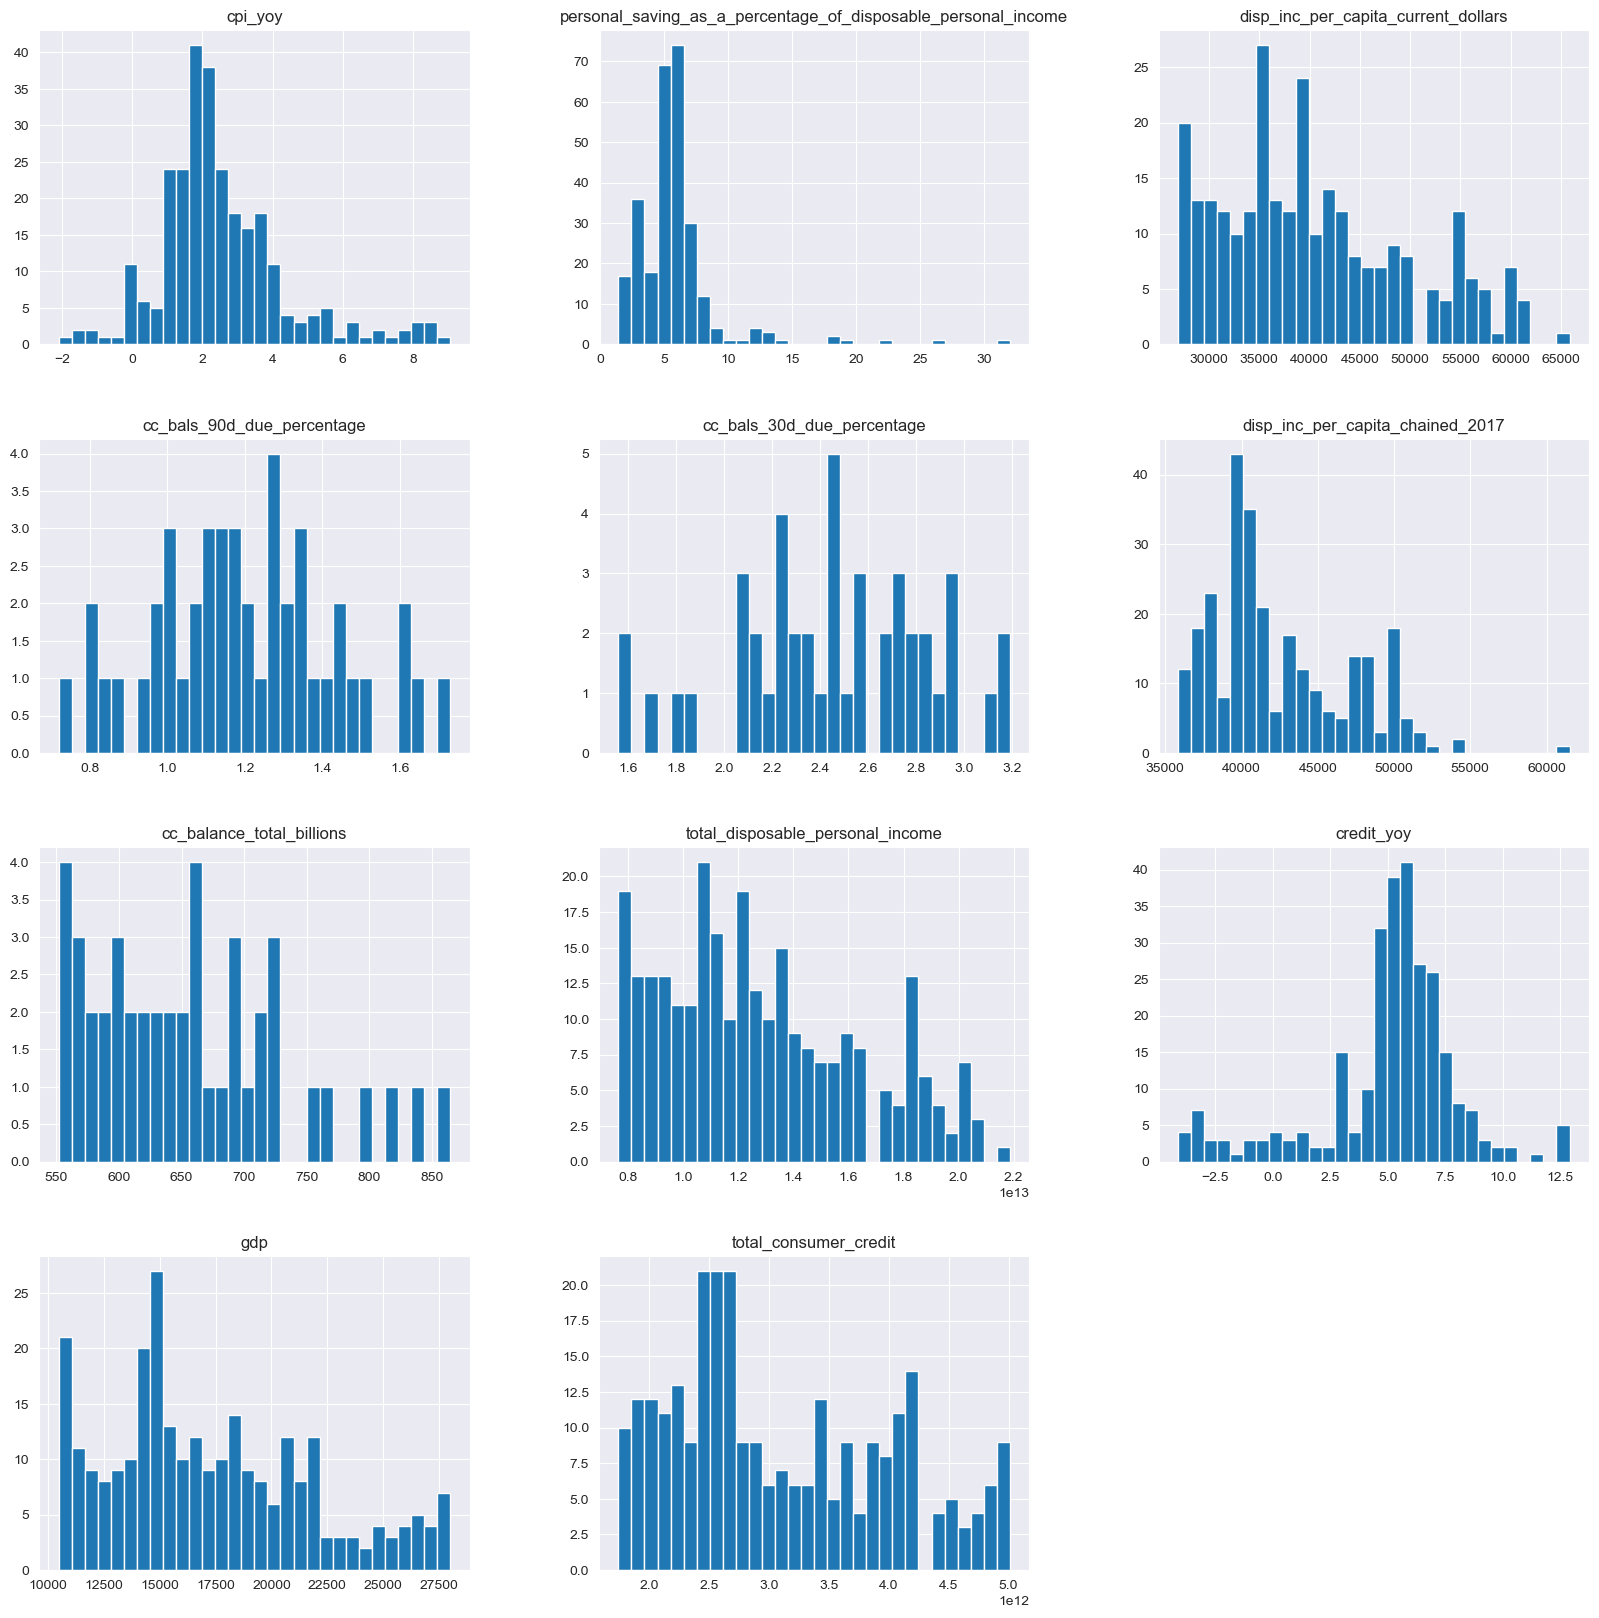

In [130]:
df_subset.hist(bins = 30, figsize = (20, 20));

- CPI slightly left skewed, centred around mean of 2.53%, slightly above FED target of 2%. Minimum of -2% and max 9% for the given period.
- Personal savings as % of disposible income very right skewed, a long tail of periods with abnormally high personal savings. 
- Disposible income per capita **current dollars** skewed right with a very flat distribution, a wide varience from 26946 to 65833. This might be explained by inflation, the nominal value of currency in the actual dollars of that specific year. 
- Disposible income per capita **chained 2017** is adjusted for inflation. Interestingly also has a wide quite flat distribution, a varience from 35843 to 61509. Median of $41,000
- Credit growth % yoy is faily normally distrbuted around a mean of 5%. With anomolies of periods with negative growthm growth close to zero and up to 12.9% growth. 

## Credit Growth & Inflation

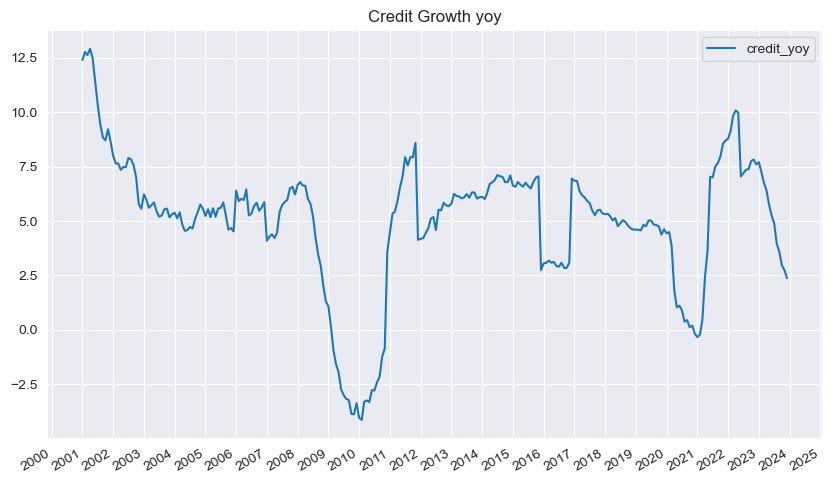

/Users/AaranDaniel/Desktop/DSI/projects/Group_Project_5_GA/code/time_series_plots.py:52: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


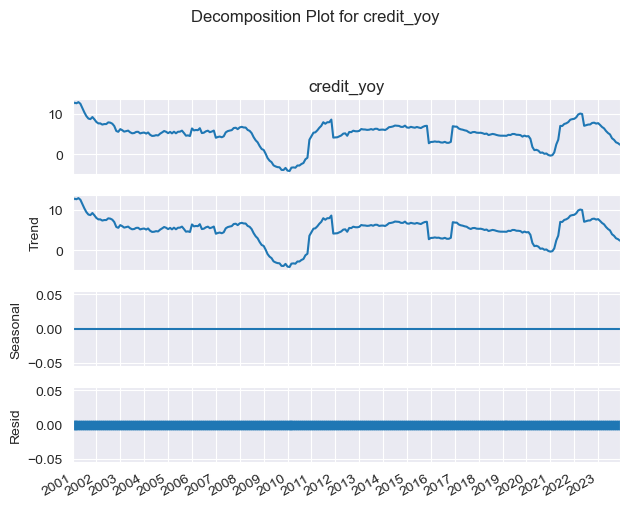

<Figure size 1000x600 with 0 Axes>

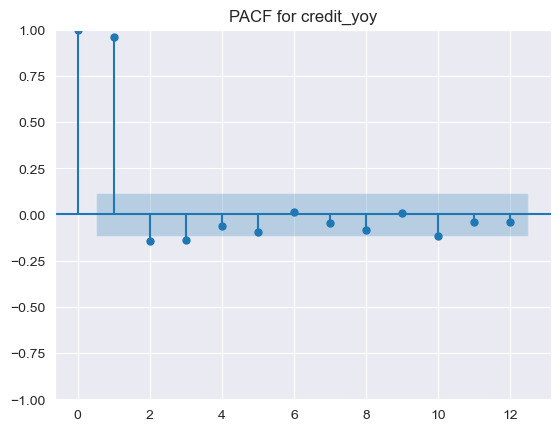

In [124]:
plot_time_series(df, columns = ['credit_yoy'],title = 'Credit Growth yoy', acc=True, pacf=True);

In [125]:
df.corr(numeric_only=True)['credit_yoy'].sort_values(ascending=False)

credit_yoy                                                         1.000000
shelter_yoy                                                        0.520146
cpi_yoy                                                            0.448303
food_yoy                                                           0.320199
energy_yoy                                                         0.299519
mortgage_rate_30_yr                                                0.248460
gasoline_yoy                                                       0.202741
all_less_food_&_shelter_yoy                                        0.184390
imports_yoy                                                        0.164761
tax_personal_current                                               0.136099
cc_balance_total_billions                                          0.111787
hourly_earnings_yoy                                                0.108193
medical_care_yoy                                                   0.103553
new_&_used_v

- Top 4 variables most correlated with credit growth are measures of inflation and CPI itself. The next highest correlated is 30 year mortage rates. 
- The unemployment rate is 0.55 negatively correlated with credit growth. Which we would expect to see, as less people are unemployed more people have access to and are willing to take on credit because they have a reliable stream of income. Basically, coonsumer confidence, credit worthiness and 

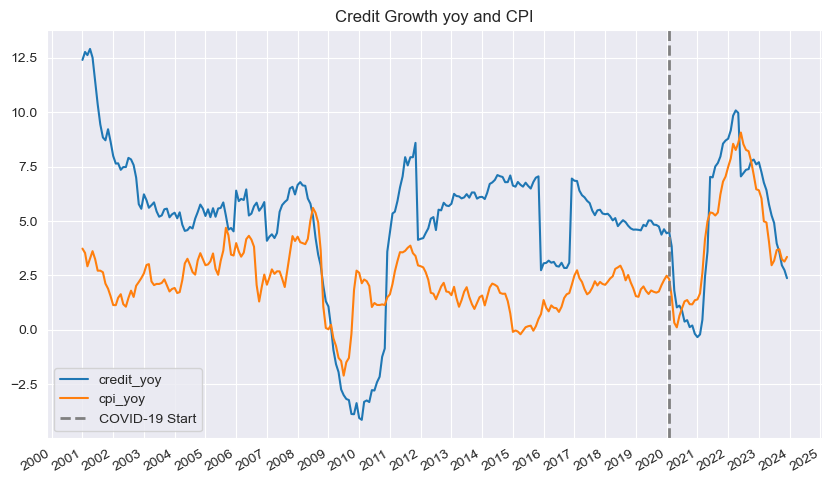

In [126]:
plot_time_series(df, columns = ['credit_yoy', 'cpi_yoy'], title = 'Credit Growth yoy and CPI', covid_start=True)

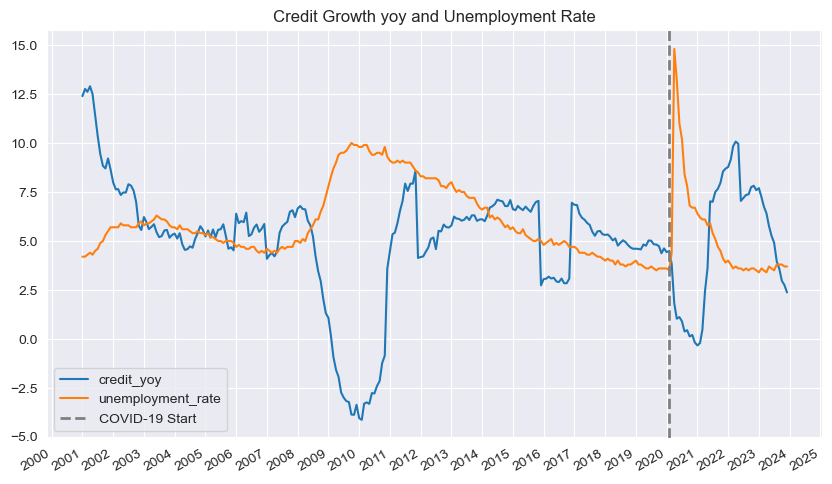

In [127]:
plot_time_series(df, columns = ['credit_yoy', 'unemployment_rate',
                                ], title = 'Credit Growth yoy and Unemployment Rate', covid_start=True);

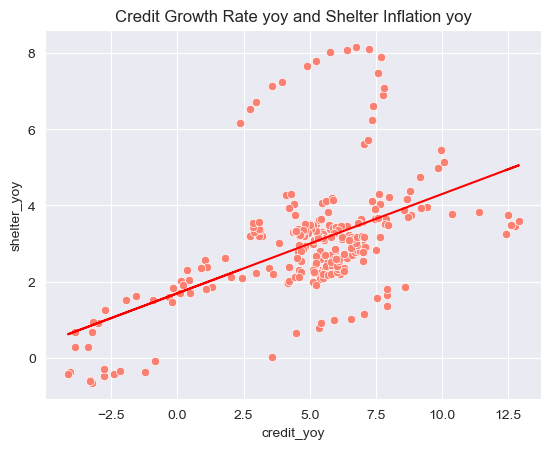

In [128]:
sns.scatterplot(df, x = 'credit_yoy', y ='shelter_yoy'
                , color = 'salmon')
plt.title('Credit Growth Rate yoy and Shelter Inflation yoy');
plt.plot(df['credit_yoy'], np.poly1d(np.polyfit(df['credit_yoy'], df['shelter_yoy'], 1))(df['credit_yoy']), color='red');

# Inflation CPI compared to import and vehicles new/used 

In [129]:
plot_time_series(df, columns = ['cpi_yoy', 'imports_yoy', 'new_&_used_vehicles_yoy'] title = 'CPI, Imports, New & Used Vehicles - Inflation')

SyntaxError: invalid syntax. Perhaps you forgot a comma? (1020178295.py, line 1)

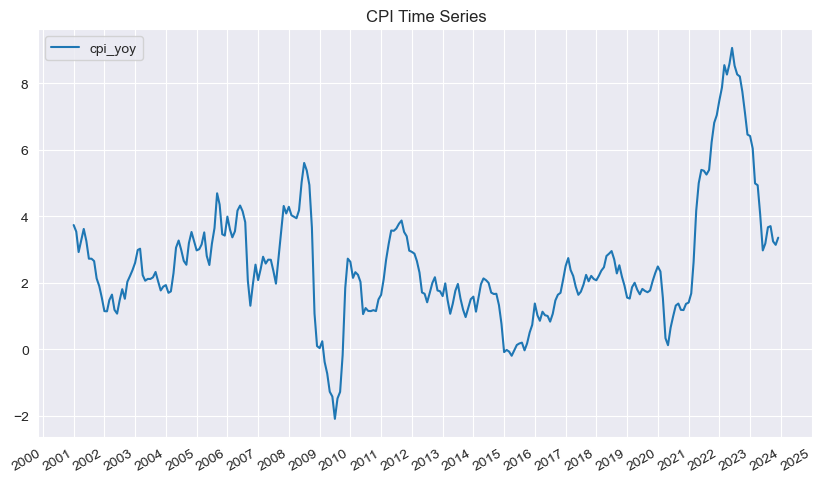

/Users/AaranDaniel/Desktop/DSI/projects/Group_Project_5_GA/code/time_series_plots.py:52: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


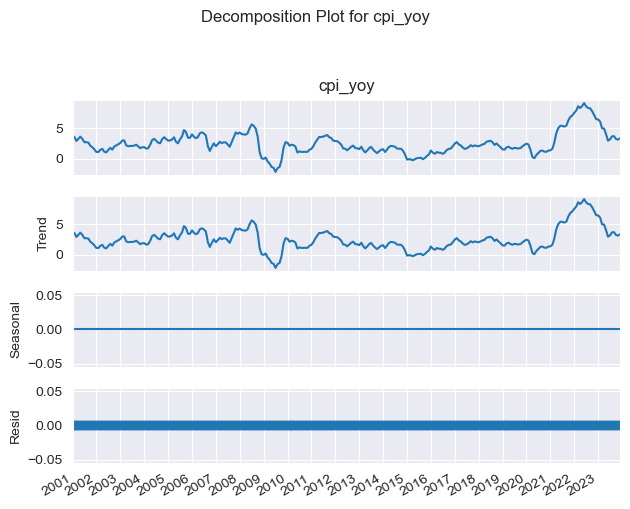

<Figure size 1000x600 with 0 Axes>

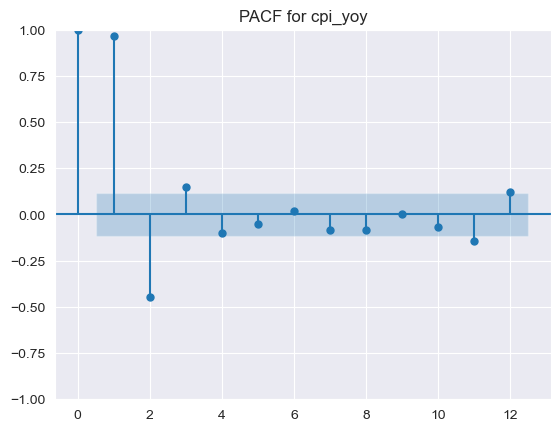

In [ ]:
plot_time_series(df_subset, columns = ['cpi_yoy'], title = 'CPI Time Series', acc=True, pacf=True);

# Disposable Income

Exploration of disposable income and savings as a percentage of disposable income. To see changes overtime and if they have a relationship with credit growth, delinquncies. 

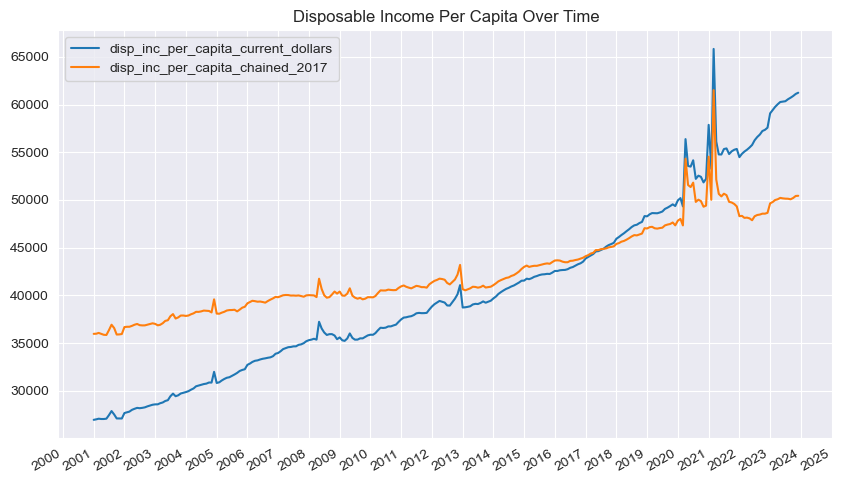

In [ ]:
# plot personal savings as % of disposable income over time 
plot_time_series(df_subset, columns = [ 'disp_inc_per_capita_current_dollars',
                                       'disp_inc_per_capita_chained_2017'],
                                         title = 'Disposable Income Per Capita Over Time');

- Large peaks in the disposable income per capita early 2020 - when covid first struck and 

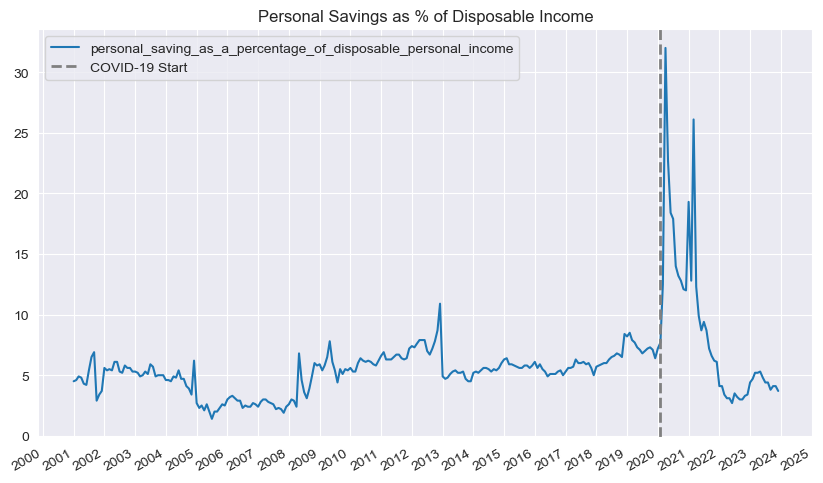

In [ ]:
plot_time_series(df_subset, columns = ['personal_saving_as_a_percentage_of_disposable_personal_income'],
                  title = 'Personal Savings as % of Disposable Income', covid_start=True);

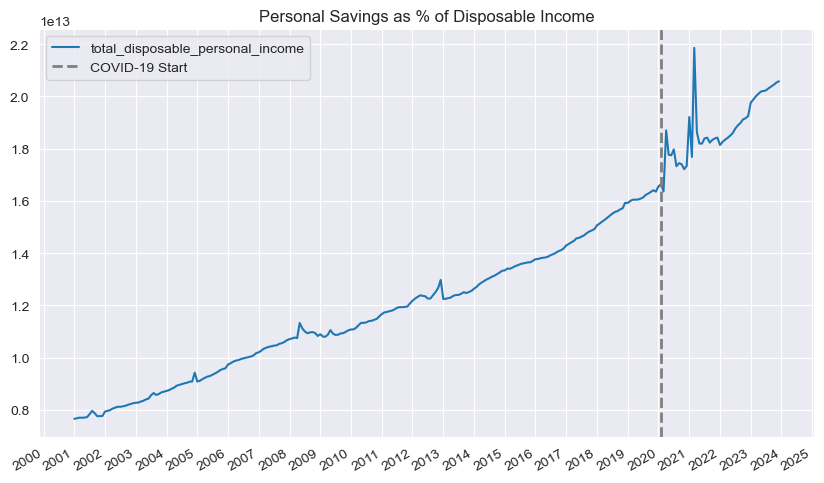

In [ ]:
plot_time_series(df_subset, columns = ['total_disposable_personal_income'],
                  title = 'Personal Savings as % of Disposable Income', covid_start=True);


In [ ]:
df.corr(numeric_only=True)['personal_saving_as_a_percentage_of_disposable_personal_income'].sort_values(ascending=False)

personal_saving_as_a_percentage_of_disposable_personal_income      1.000000
total_personal_savings                                             0.961533
unemployment_insurance                                             0.721666
total_gov_social_benefits                                          0.627349
disp_inc_per_capita_chained_2017                                   0.545301
total_disposible_personal_income_chained_2017                      0.506678
unemployment_rate                                                  0.434669
disp_inc_per_capita_current_dollars                                0.405410
total_disposable_personal_income                                   0.404414
total_personal_income                                              0.383022
rental_income_(capital_consumption_adjusted)                       0.379067
population                                                         0.377813
veterans'_benefits                                                 0.371647
medicare    

### Credit and Credit Card Debt 

In [ ]:
df.corr(numeric_only=True)['credit_yoy'].sort_values(ascending=False)

credit_yoy                                                         1.000000
shelter_yoy                                                        0.520146
cpi_yoy                                                            0.448303
food_yoy                                                           0.320199
energy_yoy                                                         0.299519
mortgage_rate_30_yr                                                0.248460
gasoline_yoy                                                       0.202741
all_less_food_&_shelter_yoy                                        0.184390
imports_yoy                                                        0.164761
tax_personal_current                                               0.136099
cc_balance_total_billions                                          0.111787
hourly_earnings_yoy                                                0.108193
medical_care_yoy                                                   0.103553
new_&_used_v

KeyError: 'time_period'

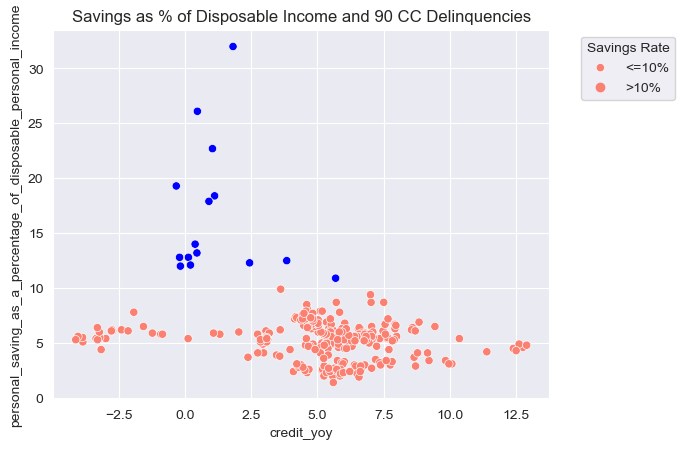

In [ ]:
# Create a new color column based on the condition
df_subset['color'] = df_subset['personal_saving_as_a_percentage_of_disposable_personal_income'].apply(lambda x: 'blue' if x > 10 else 'salmon')

# Plot with conditional coloring
sns.scatterplot(data=df_subset, x='credit_yoy', y='personal_saving_as_a_percentage_of_disposable_personal_income', hue='color', palette=['salmon', 'blue'])
plt.title('Savings as % of Disposable Income and 90 CC Delinquencies')
plt.legend(title='Savings Rate', labels=['<=10%', '>10%'], bbox_to_anchor=(1.05, 1), loc='upper left')

# Filter the DataFrame for points above 10%
df_above_10 = df_subset[df_subset['personal_saving_as_a_percentage_of_disposable_personal_income'] > 10]

# Assuming 'time_period' is the column that identifies the time period in your DataFrame
time_periods_above_10 = df_above_10['time_period']

# Print or store the time periods
print("Time periods where personal savings as a percentage of disposable income is above 10%:")
print(time_periods_above_10)

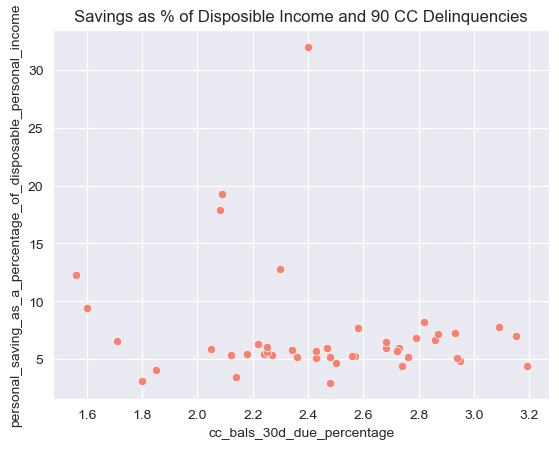

In [ ]:
sns.scatterplot(df_subset, x = 'cc_bals_30d_due_percentage', y ='personal_saving_as_a_percentage_of_disposable_personal_income'
                , color = 'salmon')
plt.title('Savings as % of Disposible Income and 90 CC Delinquencies');

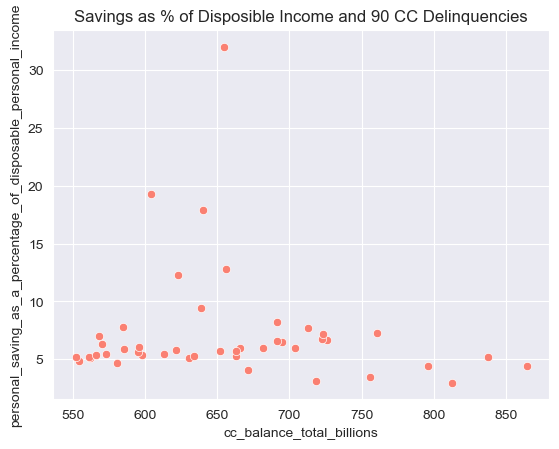

In [ ]:
sns.scatterplot(df, x = 'cc_balance_total_billions', y ='personal_saving_as_a_percentage_of_disposable_personal_income'
                , color = 'salmon')
plt.title('Savings as % of Disposible Income and 90 CC Delinquencies');

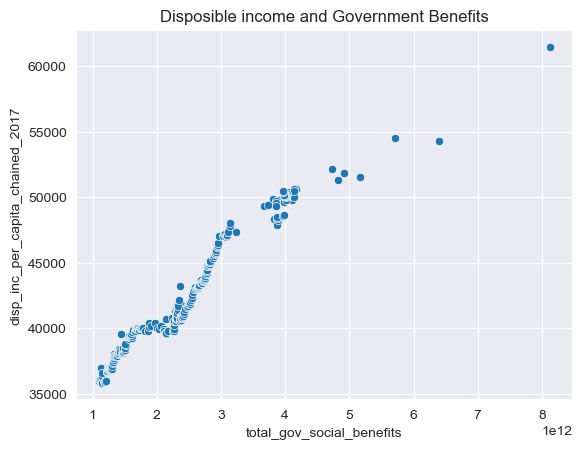

In [ ]:
sns.scatterplot(df_subset, x = 'total_gov_social_benefits', y ='disp_inc_per_capita_chained_2017', legend = None)
plt.title('Disposible income and Government Benefits');

### Loan Delinquency By State

In [ ]:
df_cc90 = pd.read_csv('../data/90_day_cc_delinquency_by_state.csv')
df_cc90.head()

,state,Q4_2003,Q4_2004,Q4_2005,Q4_2006,Q4_2007,Q4_2008,Q4_2009,Q4_2010,Q4_2011,...,Q4_2013,Q4_2014,Q4_2015,Q4_2016,Q4_2017,Q4_2018,Q4_2019,Q4_2020,Q4_2021,Q4_2022
0,AK,5.21,5.68,5.20,6.61,6.40,5.58,7.01,7.61,5.65,...,5.00,3.98,5.36,5.01,5.83,6.34,6.58,7.84,7.53,6.46
1,AL,11.92,11.09,10.70,11.88,11.07,10.13,11.61,11.94,10.23,...,9.05,7.69,7.45,7.16,7.68,7.73,8.37,9.14,8.53,8.17
2,AR,11.22,10.75,10.08,11.38,10.79,10.15,11.79,11.54,9.61,...,8.58,7.01,7.63,7.81,8.66,9.06,9.74,10.74,10.23,9.49
3,AZ,8.97,9.19,8.34,9.10,8.96,10.95,16.36,17.26,14.44,...,12.00,8.94,9.26,8.63,9.54,9.87,10.39,10.93,9.40,8.01
4,CA,8.84,8.55,7.65,8.98,9.32,11.57,17.19,17.71,14.87,...,11.14,8.06,8.48,8.15,8.37,8.23,8.70,10.41,9.07,7.90


In [ ]:
df_melted_cc90 = df_cc90.melt(id_vars=["state"], var_name="year", value_name="delinquency")
# remove 'Q4' from year column names  
df_melted_cc90['year'] = df_melted_cc90['year'].apply(lambda x: int(x.split('_')[1]))
df_melted_cc90.describe()
df_melted_cc90

,state,year,delinquency
0,AK,2003,5.21
1,AL,2003,11.92
2,AR,2003,11.22
3,AZ,2003,8.97
4,CA,2003,8.84
...,...,...,...
1055,WA,2022,5.23
1056,WI,2022,4.94
1057,WV,2022,8.35
1058,WY,2022,6.67


In [ ]:
df_melted_cc90.groupby('state')['delinquency'].mean().sort_values(ascending=False)

state
NV       13.177500
FL       12.587000
PR       12.001429
TX       10.818500
AZ       10.690500
CA       10.322500
SC       10.284500
MS       10.216500
AR        9.768000
AL        9.555500
NY        9.542000
GA        9.520000
LA        9.492000
DE        9.452000
RI        9.274500
OK        9.271500
NM        9.257500
allUS     9.166000
NC        9.040000
TN        8.826500
WV        8.806500
PA        8.709500
MO        8.657000
KY        8.376000
MA        8.311000
MI        8.276500
NJ        8.224500
OH        8.097000
ME        8.056000
OR        7.960000
IL        7.936000
HI        7.882500
MT        7.854000
CT        7.813500
MD        7.804000
NH        7.732500
IN        7.624500
ID        7.577000
CO        7.518500
DC        7.513000
KS        7.308000
VT        7.160500
WY        7.149000
IA        6.988000
UT        6.973000
VA        6.891500
WA        6.690500
MN        6.625000
SD        6.547000
NE        6.492000
WI        6.168000
AK        6.005000
ND    

In [ ]:
selected_states_lowest_highest = df_melted_cc90[['NV', 'FL', 'PR', 'ND', 'AK', 'allUS']]

# Plotting
plt.figure(figsize=(14, 8))
sns.lineplot(data=selected_states_lowest_highest, x="year", y="delinquency", hue="state", style="state", markers=True, dashes=False)

# Customization
plt.title('States with Highest and Lowest Delinquency Rates and allUS (2003-2022)')
plt.xlabel('Year')
plt.ylabel('Delinquency Rate (%)')
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
sns.set_style("whitegrid")

plt.show()

KeyError: "None of [Index(['NV', 'FL', 'PR', 'ND', 'AK', 'allUS'], dtype='object')] are in the [columns]"

In [ ]:
df_auto90 = pd.read_csv('../data/90_day_autoloan_delinquency_by_state.csv')
df_auto90.head()

,state,Q4_2003,Q4_2004,Q4_2005,Q4_2006,Q4_2007,Q4_2008,Q4_2009,Q4_2010,Q4_2011,...,Q4_2013,Q4_2014,Q4_2015,Q4_2016,Q4_2017,Q4_2018,Q4_2019,Q4_2020,Q4_2021,Q4_2022
0,AK,0.83,1.04,1.06,0.91,1.17,1.28,1.70,2.18,1.99,...,1.69,1.78,1.70,2.09,2.41,2.29,2.53,2.93,2.53,2.05
1,AL,2.63,2.80,2.41,2.88,3.43,4.48,5.69,6.33,5.76,...,4.82,4.97,4.87,5.32,5.75,6.15,6.59,6.22,5.79,5.58
2,AR,2.06,2.30,1.77,2.21,2.62,3.14,3.98,4.26,3.72,...,2.53,3.03,3.19,3.89,4.39,4.97,5.47,5.33,4.60,4.38
3,AZ,2.86,2.92,2.43,2.60,3.82,5.70,7.46,8.78,8.13,...,4.87,4.46,4.01,4.29,4.57,4.75,5.22,4.89,4.00,3.73
4,CA,1.89,2.10,1.90,2.62,3.60,4.98,6.18,6.48,5.50,...,3.07,2.85,2.55,2.92,3.63,4.15,4.89,4.80,3.83,3.35
